#MP NEURON:

In [ ]:
from sklearn import datasets
import numpy as np

In [ ]:
breast_cancer_data=datasets.load_breast_cancer()

In [ ]:
x=breast_cancer_data.data
y=breast_cancer_data.target

In [ ]:
import pandas as pd
data=pd.DataFrame(x,columns=breast_cancer_data.feature_names)

In [ ]:
data['class']=breast_cancer_data.target

In [ ]:
print(data.head)

<bound method NDFrame.head of      mean radius  mean texture  ...  worst fractal dimension  class
0          17.99         10.38  ...                  0.11890      0
1          20.57         17.77  ...                  0.08902      0
2          19.69         21.25  ...                  0.08758      0
3          11.42         20.38  ...                  0.17300      0
4          20.29         14.34  ...                  0.07678      0
..           ...           ...  ...                      ...    ...
564        21.56         22.39  ...                  0.07115      0
565        20.13         28.25  ...                  0.06637      0
566        16.60         28.08  ...                  0.07820      0
567        20.60         29.33  ...                  0.12400      0
568         7.76         24.54  ...                  0.07039      1

[569 rows x 31 columns]>


In [ ]:
print(data.shape)

(569, 31)


In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
data['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
y=data['class']
x=data.drop('class',axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (512, 30) (57, 30)


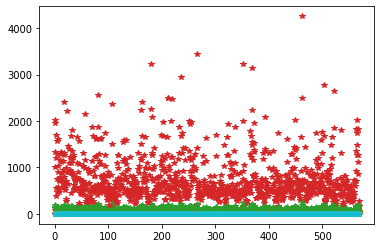

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_train,'*')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

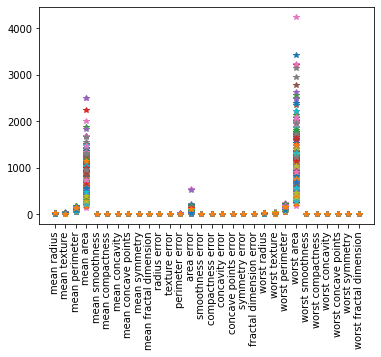

In [ ]:
#to understand the variance among the different columns of data.
plt.plot(x_train.T,'*')
plt.xticks(rotation='vertical')

In [ ]:
print(x_train.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

**All the columns are of type float and in mp neuron model we can only have binary inputs.**

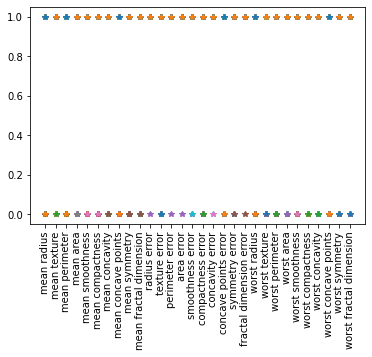

In [ ]:
x_train_binarised=x_train.apply(pd.cut,bins=2,labels=[1,0])
plt.xticks(rotation='vertical')
plt.plot(x_train_binarised.T,'*')

In [ ]:
x_test_binarised=x_test.apply(pd.cut,bins=2,labels=[1,0])


In [ ]:
from sklearn.metrics import accuracy_score
class mpneuron:
  def __init__(self):
    self.b=None
  
  def model(self,x):
    return (np.sum(x)>=self.b)
  
  def predict(self,x):
    pred=[]
    for i in x:
      pred.append(self.model(i))
    return pred
    
  def fit(self,x,y):
    self.accuracy={}
    self.max_accuracy=0
    self.max_accuracy_b=None
    for b in range(x.shape[0]+1):
        self.b=b
        y_pred=self.predict(x)
        self.accuracy[b]=accuracy_score(y_pred,y)
        if self.max_accuracy<=self.accuracy[b]:
          self.max_accuracy=self.accuracy[b]
          self.max_accuracy_b=self.b
    best_b=max(self.accuracy,key=self.accuracy.get)
    self.b=best_b


    

In [ ]:
x_train_binarised=x_train_binarised.values
x_test_binarised=x_test_binarised.values

In [ ]:
mp=mpneuron()

In [ ]:
mp.fit(x_train_binarised,y_train)

In [ ]:
print('maximum accuracy is:',mp.max_accuracy,'at b=',mp.max_accuracy_b)
print(mp.accuracy)

maximum accuracy is: 0.849609375 at b= 28
{0: 0.626953125, 1: 0.626953125, 2: 0.626953125, 3: 0.626953125, 4: 0.626953125, 5: 0.626953125, 6: 0.626953125, 7: 0.626953125, 8: 0.626953125, 9: 0.626953125, 10: 0.626953125, 11: 0.626953125, 12: 0.626953125, 13: 0.626953125, 14: 0.630859375, 15: 0.6328125, 16: 0.642578125, 17: 0.6484375, 18: 0.65625, 19: 0.6640625, 20: 0.671875, 21: 0.6875, 22: 0.701171875, 23: 0.724609375, 24: 0.755859375, 25: 0.78515625, 26: 0.818359375, 27: 0.845703125, 28: 0.849609375, 29: 0.814453125, 30: 0.759765625, 31: 0.373046875, 32: 0.373046875, 33: 0.373046875, 34: 0.373046875, 35: 0.373046875, 36: 0.373046875, 37: 0.373046875, 38: 0.373046875, 39: 0.373046875, 40: 0.373046875, 41: 0.373046875, 42: 0.373046875, 43: 0.373046875, 44: 0.373046875, 45: 0.373046875, 46: 0.373046875, 47: 0.373046875, 48: 0.373046875, 49: 0.373046875, 50: 0.373046875, 51: 0.373046875, 52: 0.373046875, 53: 0.373046875, 54: 0.373046875, 55: 0.373046875, 56: 0.373046875, 57: 0.373046875, 

In [ ]:
print(accuracy_score(mp.predict(x_test_binarised),y_test))

0.7894736842105263


#Perceptron:

**Here we are allowed to give real input so we don't require to binarise but we need to standardise the data.**

In [ ]:
from sklearn import datasets
import numpy as np
breast_cancer_data=datasets.load_breast_cancer()

In [ ]:
x=breast_cancer_data.data
y=breast_cancer_data.target

In [ ]:
data=pd.DataFrame(x,columns=breast_cancer_data.feature_names)

In [ ]:
data['class']=y

In [ ]:
print(data.head())

   mean radius  mean texture  ...  worst fractal dimension  class
0        17.99         10.38  ...                  0.11890      0
1        20.57         17.77  ...                  0.08902      0
2        19.69         21.25  ...                  0.08758      0
3        11.42         20.38  ...                  0.17300      0
4        20.29         14.34  ...                  0.07678      0

[5 rows x 31 columns]


In [ ]:
from sklearn.model_selection import train_test_split
y=data['class']
x=data.drop('class',axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (512, 30) (57, 30)


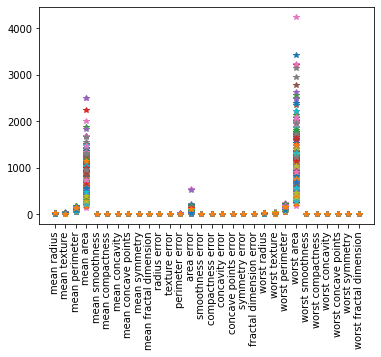

In [ ]:
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')
plt.plot(x_train.T,'*')

**We need to standardise as our different columns have different ranges.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

In [ ]:
class perceptron:
  def __init__(self):
    self.b=None                          #intialising b and w to none as we yet don't know for what values we have to initialize them.
    self.w=None

  def model(self,x):
    return  (np.dot(self.w,x)>=self.b)      #model will give 1 or 0 as output for particular datapoint xi.
  def predict(self,x):
    y_pred=[]
    for i in x:                              #predict take x as input and give a vector of predicted values of all xi in x.
      y_pred.append(self.model(i))
    return np.array(y_pred)

  def fit(self,x,y,epochs=1,lr=1):
    self.w=np.ones(x.shape[1])
    self.b=0
    self.max_accuracy=0
    self.max_accuracy_at_epoch=0
    self.accuracy={}
    optimal_b=0
    optimal_w=np.ones(x.shape[1])
    for p in range(epochs):            #epoch is the hyper pararmeter
      for i,j in zip(x,y):
        res=self.model(i)
        if res==0 and j==1:
          self.w=self.w+(lr*i)
          self.b=self.b+(lr*1)
        if j==0 and res==1:
          self.w=self.w-(lr*i)
          self.b=self.b-(1*lr)
      self.accuracy[p]=accuracy_score(self.predict(x),y)
      if self.max_accuracy<=self.accuracy[p]:
        optimal_w=self.w
        optimal_w=self.b
    self.w=optimal_w
    self.b=optimal_b


    

In [ ]:
p=perceptron()

In [ ]:
p.fit(x_train_norm,y_train,500,0.1)

AttributeError: ignored

In [ ]:
a=np.ones(x_train.shape[1])
print(np.dot(a,x_train_norm[0]))

10.875400342514157
